In [2]:
%matplotlib inline
from __future__ import print_function
from pylab import *
from IPython.html.widgets import interactive
import IPython.html.widgets as widgets
from IPython.display import display

:0: FutureWarning: IPython widgets are experimental and may change in the future.


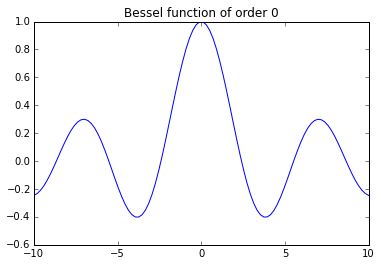

In [3]:
from scipy.special import j0, j1, y0, y1

def bessel_fig(order, limit, N, static=False):
    if order==0: bessel = j0
    if order==1: bessel = j1
    if order==2: bessel = y0
    if order==3: bessel = y1
        
    x = linspace(-limit, limit, num=N)
    y = bessel(x)
    
    fig = figure()
    title('Bessel function of order {0}'.format(order))
    plot(x, y)
    if not static: show()
    if static    : return fig
    
order_slider = widgets.IntSliderWidget(min=0, max=3, step=1, value=0)
limit_slider = widgets.FloatSliderWidget(min=10, max=60, step=0.5, value=10)
N_slider     = widgets.IntSliderWidget(min=10, max=100, step=10, value=100)

w = interactive(bessel_fig, N=N_slider, order=order_slider, limit=limit_slider)
display(w)

In [19]:
from ipywidgets import StaticInteract, RangeWidget

def bessel_fig_static(order):
    fig = bessel_fig(order, 30, 100, static=True)
    close()
    return fig

N_slider_s     = RangeWidget(70, 100, 10)
order_slider_s = RangeWidget(0, 3)
limit_slider_s = RangeWidget(10, 60, 10)

w = StaticInteract(bessel_fig_static, order=order_slider_s)

In [24]:
f = open('widget.html', 'wb')
print(w.html(), file=f)